In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('_DATA/stock/VISA_NYSE_2019.12.17-2021.12.17.csv')
# add column for close price on previous day
dataset['Volume-Previous-Day'] = dataset['Volume'].shift(1)
dataset = dataset.dropna()
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volume-Previous-Day
1,2019-12-18,185.520004,186.440002,184.899994,184.899994,182.646896,8968500,10208700.0
2,2019-12-19,184.500000,186.580002,184.500000,186.539993,184.266891,5854200,8968500.0
3,2019-12-20,187.600006,188.169998,186.300003,188.000000,185.709091,11259500,5854200.0
4,2019-12-23,188.149994,188.410004,187.000000,187.080002,184.800339,5831700,11259500.0
5,2019-12-24,187.100006,188.020004,186.910004,187.570007,185.284378,2420900,5831700.0


In [2]:
# data preprocessing
X = dataset[['Open', 'Volume-Previous-Day']].values
y = dataset['Close'].values

In [3]:
# split data to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0, shuffle = False)

print("Train size =", len(y_train))
print("Test size =", len(y_test))

Train size = 337
Test size = 167


In [4]:
import time
start_time_ms = time.time() * 1000

# Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)

end_time_ms = time.time() * 1000
print("Prediction completed. Time spent = %.3f seconds" % ((end_time_ms - start_time_ms) / 1000))

Prediction completed. Time spent = 0.068 seconds


In [5]:
# diplay stats 
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
#print("y_test", y_test)
#print("y_pred", y_pred)
print('Coefficients: \n', regressor.coef_)
print('Intercepts:', regressor.intercept_)    # the intercept (often labeled the constant) 
                                                 # is the expected mean value of Y when all X=0
print('Score of the model: %.2f' % regressor.score(X_test, y_test))
print('R^2 score: %.2f' % r2_score(y_test, y_pred))
print("RMSE (root mean square error): %.2f" % sqrt(mean_squared_error(y_test, y_pred)))

Coefficients: 
 [9.90793678e-01 6.48502239e-08]
Intercepts: 1.1765603006335539
Score of the model: 0.95
R^2 score: 0.95
RMSE (root mean square error): 2.73


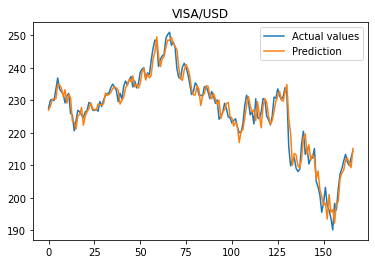

In [6]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual values', 'Prediction'])
plt.title("VISA/USD")
plt.show()